In [1]:
## Quickstart

In [1]:
# Define logging - controls output

import logging

logging.basicConfig(
    level=logging.ERROR,
    format="%(asctime)s\t%(name)s\t%(levelname)s\t%(message)s")

/Users/darrentpk/opt/anaconda3/envs/eqcorrscan/lib/python3.8/site-packages/obspy/imaging/maps.py:303: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = fig.colorbar(


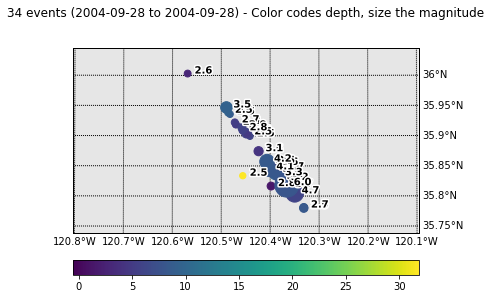

In [3]:
# Use NCEDC catalog of events. Use picks from the 20 most picked stations
# %matplotlib inline (Not using notebook)
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from eqcorrscan.utils.catalog_utils import filter_picks

client = Client("NCEDC")
t1 = UTCDateTime(2004, 9, 28)
t2 = t1 + 86400
catalog_raw = client.get_events(
    starttime=t1, endtime=t2, minmagnitude=2.5, minlatitude=35.7, maxlatitude=36.1,
    minlongitude=-120.6, maxlongitude=-120.2, includearrivals=True)
fig = catalog_raw.plot(projection="local", resolution="l") 
catalog = filter_picks(catalog=catalog_raw, evaluation_mode="manual", top_n_picks=20)

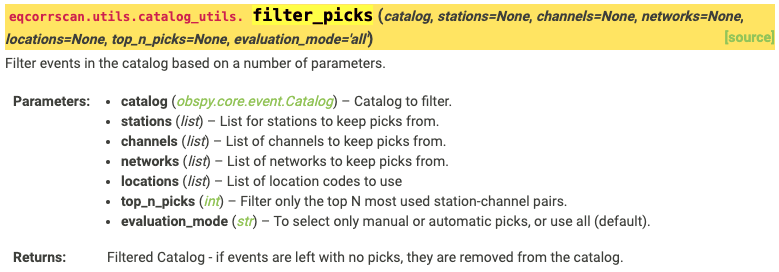

In [48]:
catalog_raw[0].amplitudes[0]

Amplitude
	       resource_id: ResourceIdentifier(id="quakeml:nc.anss.org/Coda/NC/55376894")
	 generic_amplitude: 43.0
	              type: 'END'
	          category: 'duration'
	              unit: 's'
	       time_window: TimeWindow(begin=0.0, end=2.0, reference=UTCDateTime(2004, 9, 28, 22, 22, 54, 270000))
	           pick_id: ResourceIdentifier(id="quakeml:nc.anss.org/Arrival/NC/68366004")
	       waveform_id: WaveformStreamID(network_code='BP', station_code='CCRB', channel_code='DP1', location_code='')
	    magnitude_hint: 'MD'
	   evaluation_mode: 'manual'
	 evaluation_status: 'final'

In [38]:
catalog_raw[0].picks[0]

Pick
	       resource_id: ResourceIdentifier(id="quakeml:nc.anss.org/Arrival/NC/68365904")
	              time: UTCDateTime(2004, 9, 28, 22, 22, 53, 340000)
	       waveform_id: WaveformStreamID(network_code='NC', station_code='PFR', channel_code='HV1', location_code='10')
	             onset: 'impulsive'
	          polarity: 'positive'
	   evaluation_mode: 'manual'
	 evaluation_status: 'final'
	     creation_info: CreationInfo(agency_id='NC', creation_time=UTCDateTime(2007, 9, 25, 23, 57, 14))

In [39]:
catalog_raw[0].amplitudes[0]

Amplitude
	       resource_id: ResourceIdentifier(id="quakeml:nc.anss.org/Coda/NC/55376894")
	 generic_amplitude: 43.0
	              type: 'END'
	          category: 'duration'
	              unit: 's'
	       time_window: TimeWindow(begin=0.0, end=2.0, reference=UTCDateTime(2004, 9, 28, 22, 22, 54, 270000))
	           pick_id: ResourceIdentifier(id="quakeml:nc.anss.org/Arrival/NC/68366004")
	       waveform_id: WaveformStreamID(network_code='BP', station_code='CCRB', channel_code='DP1', location_code='')
	    magnitude_hint: 'MD'
	   evaluation_mode: 'manual'
	 evaluation_status: 'final'

In [40]:
catalog_raw[0].origins[0]

Origin
	        resource_id: ResourceIdentifier(id="quakeml:nc.anss.org/Origin/NC/5723484")
	               time: UTCDateTime(2004, 9, 28, 22, 22, 52, 300000)
	          longitude: -120.4701667
	           latitude: 35.9191667
	              depth: 5074.0 [uncertainty=200.0]
	         depth_type: 'from location'
	         time_fixed: False
	    epicenter_fixed: False
	          method_id: ResourceIdentifier(id="smi:nc.anss.org/origin/HYPO_m2g")
	            quality: OriginQuality(associated_phase_count=70, used_phase_count=52, associated_station_count=70, used_station_count=56, standard_error=0.06, azimuthal_gap=39.0, secondary_azimuthal_gap=374.0, minimum_distance=0.0163, maximum_distance=1.14, median_distance=0.4076)
	        origin_type: 'hypocenter'
	 origin_uncertainty: OriginUncertainty(horizontal_uncertainty=150.0, confidence_ellipsoid=ConfidenceEllipsoid(semi_major_axis_length=504.0, semi_minor_axis_length=240.0, semi_intermediate_axis_length=360.0, major_axis_plunge=76.0, majo

In [41]:
catalog_raw[0].magnitudes[0]

Magnitude
	                     resource_id: ResourceIdentifier(id="quakeml:nc.anss.org/Netmag/NC/3434954")
	                             mag: 2.65 [uncertainty=0.11]
	                  magnitude_type: 'Md'
	                       origin_id: ResourceIdentifier(id="quakeml:nc.anss.org/Origin/NC/5723484")
	                       method_id: ResourceIdentifier(id="smi:nc.anss.org/magnitude/Eworm_Md")
	                   station_count: 57
	                 evaluation_mode: 'manual'
	               evaluation_status: 'final'
	                   creation_info: CreationInfo(agency_id='NC', creation_time=UTCDateTime(2007, 9, 25, 23, 57, 14))
	                            ---------
	 station_magnitude_contributions: 120 Elements

In [44]:
catalog_raw[0].station_magnitudes[3]

StationMagnitude
	            resource_id: ResourceIdentifier(id="quakeml:nc.anss.org/AssocCoM/NC/55376814")
	              origin_id: ResourceIdentifier(id="quakeml:nc.anss.org/Origin/NC/5723484")
	                    mag: 2.7
	 station_magnitude_type: 'MD'
	           amplitude_id: ResourceIdentifier(id="quakeml:nc.anss.org/Coda/NC/55376814")
	            waveform_id: WaveformStreamID(network_code='NC', station_code='PST', channel_code='EHZ', location_code='')

In [6]:
# Data are available via Client. Generate tribe of templates directly from client.
from eqcorrscan import Tribe

tribe = Tribe().construct(
    method="from_client", lowcut=4.0, highcut=15.0, samp_rate=50.0, length=6.0,
    filt_order=4, prepick=0.5, client_id=client, catalog=catalog_raw, data_pad=20.,
    process_len=21600, min_snr=5.0, parallel=True)
print(tribe)

Tribe of 34 templates


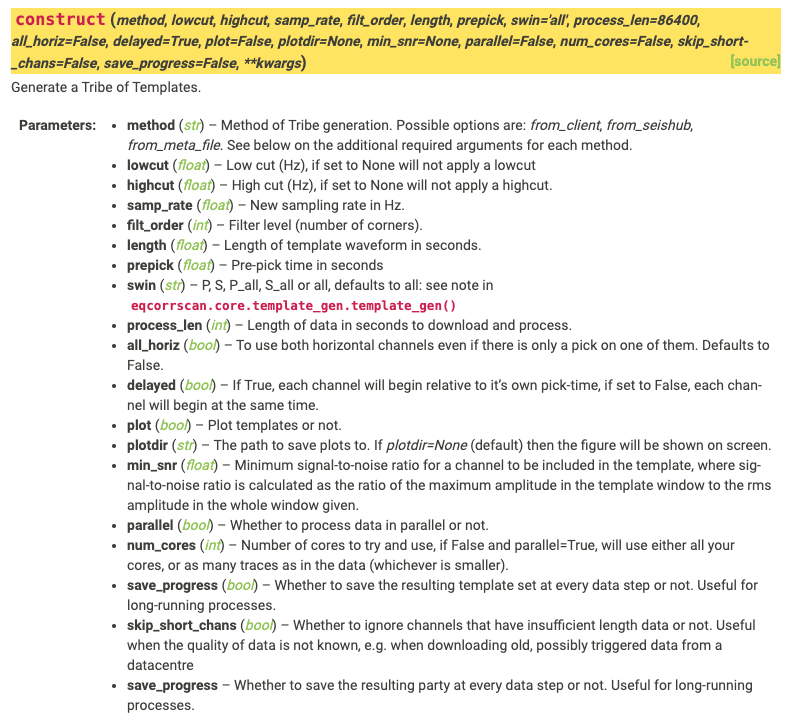

Template 2004_09_28t17_15_25: 
	 20 channels;
	 lowcut: 4.0 Hz;
	 highcut: 15.0 Hz;
	 sampling rate 50.0 Hz;
	 filter order: 4; 
	 process length: 21600.0 s


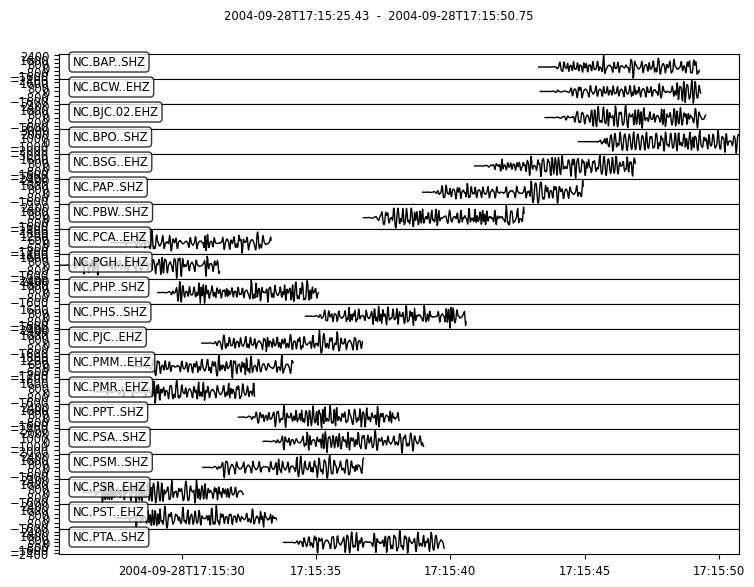

In [5]:
# Visualize attributes of a Template
print(tribe[0])
fig = tribe[0].st.plot(equal_scale=False, size=(800, 600))

In [6]:
# Remove templates with fewer than 5 stations
tribe.templates = [t for t in tribe if len({tr.stats.station for tr in t.st}) >= 5]
print(tribe)
party, st = tribe.client_detect(
    client=client, starttime=t1, endtime=t1 + (86400 * 2), threshold=9.,
    threshold_type="MAD", trig_int=2.0, plot=False, return_stream=True)

Tribe of 28 templates


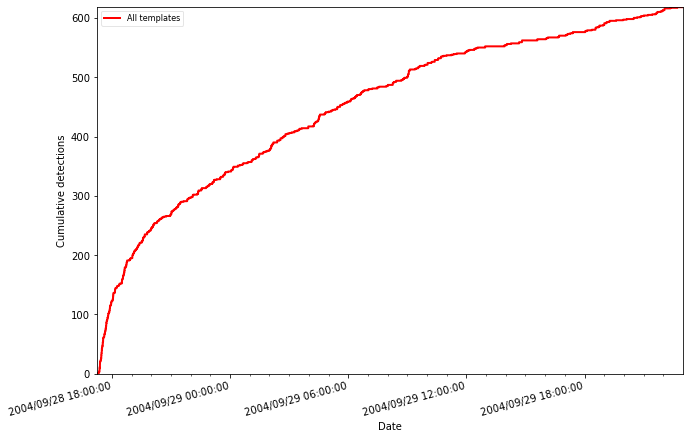

In [7]:
# Visualize cumulative detections
fig = party.plot(plot_grouped=True)

Family of 106 detections from template 2004_09_28t20_05_53


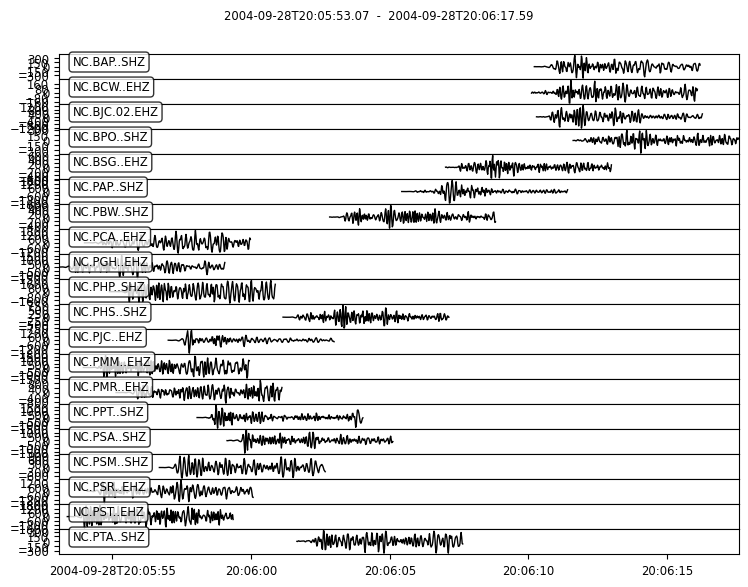

In [8]:
# Look at most productive family
family = sorted(party.families, key=lambda f: len(f))[-1]
print(family)
fig = family.template.st.plot(equal_scale=False, size=(800, 600))

In [9]:
# Provide merged stream to lag-calc
st = st.merge(method=1)
repicked_catalog = party.lag_calc(st, pre_processed=False, shift_len=0.5, min_cc=0.4)

In [10]:
# Look at one event that we picked
print(repicked_catalog[100].picks[0])
print(repicked_catalog[100].picks[0].comments[0])

Pick
	     resource_id: ResourceIdentifier(id="smi:local/3ee62ed2-406d-4676-8fbc-ca3663e9faaf")
	            time: UTCDateTime(2004, 9, 28, 18, 45, 16, 20000)
	     waveform_id: WaveformStreamID(network_code='NC', station_code='PAP', channel_code='SHZ', location_code='')
	       method_id: ResourceIdentifier(id="EQcorrscan")
	      phase_hint: 'P'
	 evaluation_mode: 'automatic'
	   creation_info: CreationInfo(agency_id='eqcorrscan.core.lag_calc')
	            ---------
	        comments: 1 Elements
Comment(text='cc_max=0.4073575735092163', resource_id=ResourceIdentifier(id="smi:local/e2318202-939c-4446-ac72-58a7ead9de8f"))
